# Usecase-1: Pump & Tank surveillance

The objective was to proactively initiate the process of pump or tank inspection and maintenance.
There could be several reasons for not getting the required amount of water in the rooftop tank such as pump operational failure, or piping or valve or water tank leakages etc. 

When the pump did not deliver the required volume of water, it was evident that the pump was consuming more wattage of electrical power but doing lesser work and also it was an inconvenience for the building occupants as the water got over faster. In case of some leakage problem in pipes, valves and tank etc. electricity and water both of the essential resources were wasted which cost a great monetary sum in long run.

By creating this model, we have helped our client to take proactive measures which was exteremely benificial. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
#Loading the Excel file to an object
df = pd.read_excel('Use_case-1-Water_tank_and_pump_surveillance.xlsx')

In [70]:
df.head()

,Unnamed: 0,Sl.no.,case id,last maintenance of pump (days),last maintenance of piping (days),last maintenance of tank (days),maintenance required (YES or NO),staff_id on duty,UG tank level before pumping (ltr.),UG tank level after pumping (ltr.),OH tank level before pumping (ltr.),OH tank level after pumping (ltr.)
0,0,1,YA-001,68.0,94.0,95.0,NO,EN-04-SE-0023,225000,135000,11500,101467
1,1,2,YA-002,214.0,317.0,NaN,YES,EN-04-SE-0214,162500,97500,11500,76440
2,2,3,YA-003,189.0,305.0,306.0,NO,EN-04-SE-0023,200000,120000,5000,84974
3,3,4,YA-004,173.0,143.0,148.0,YES,EN-04-SE-0001,250000,150000,12500,112410
4,4,5,YA-005,98.0,NaN,126.0,NO,EN-04-SE-0023,162500,97500,5000,69971


In [71]:
#Checking for Null values and other info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           100 non-null    int64  
 1   Sl.no.                               100 non-null    int64  
 2   case id                              100 non-null    object 
 3   last maintenance of pump (days)      91 non-null     float64
 4   last maintenance of piping (days)    91 non-null     float64
 5   last maintenance of tank (days)      88 non-null     float64
 6   maintenance required (YES or NO)     100 non-null    object 
 7   staff_id on duty                     100 non-null    object 
 8   UG tank level before pumping (ltr.)  100 non-null    int64  
 9   UG tank level after pumping (ltr.)   100 non-null    int64  
 10  OH tank level before pumping (ltr.)  100 non-null    int64  
 11  OH tank level after pumping (ltr.

In [72]:
#Adding new columns evaluating the difference in tank levels:
df['diff_in_UGTank_lvl'] = df['UG tank level before pumping (ltr.)'] - df['UG tank level after pumping (ltr.)']
df['diff_in_OHTank_lvl'] = df['OH tank level after pumping (ltr.)'] - df['OH tank level before pumping (ltr.)']

In [73]:
df.head(3)

,Unnamed: 0,Sl.no.,case id,last maintenance of pump (days),last maintenance of piping (days),last maintenance of tank (days),maintenance required (YES or NO),staff_id on duty,UG tank level before pumping (ltr.),UG tank level after pumping (ltr.),OH tank level before pumping (ltr.),OH tank level after pumping (ltr.),diff_in_UGTank_lvl,diff_in_OHTank_lvl
0,0,1,YA-001,68.0,94.0,95.0,NO,EN-04-SE-0023,225000,135000,11500,101467,90000,89967
1,1,2,YA-002,214.0,317.0,NaN,YES,EN-04-SE-0214,162500,97500,11500,76440,65000,64940
2,2,3,YA-003,189.0,305.0,306.0,NO,EN-04-SE-0023,200000,120000,5000,84974,80000,79974


In [74]:
"""
Finding the mismatch in water volume and showing it a new column (named as "vol_mismatch"). Mismatch as in the volume of water discharged
from UG tank should reflect in the OH tank volume after pumping. So we will know exactly how much water
is getting wasted if there is any technical failure in the system.
"""
df['vol_mismatch'] = df['diff_in_UGTank_lvl'] - df['diff_in_OHTank_lvl']

In [75]:
df.head(3)

,Unnamed: 0,Sl.no.,case id,last maintenance of pump (days),last maintenance of piping (days),last maintenance of tank (days),maintenance required (YES or NO),staff_id on duty,UG tank level before pumping (ltr.),UG tank level after pumping (ltr.),OH tank level before pumping (ltr.),OH tank level after pumping (ltr.),diff_in_UGTank_lvl,diff_in_OHTank_lvl,vol_mismatch
0,0,1,YA-001,68.0,94.0,95.0,NO,EN-04-SE-0023,225000,135000,11500,101467,90000,89967,33
1,1,2,YA-002,214.0,317.0,NaN,YES,EN-04-SE-0214,162500,97500,11500,76440,65000,64940,60
2,2,3,YA-003,189.0,305.0,306.0,NO,EN-04-SE-0023,200000,120000,5000,84974,80000,79974,26


In [76]:
df['vol_mismatch']

0     33
1     60
2     26
3     90
4     29
      ..
95    13
96     8
97    39
98    12
99    66
Name: vol_mismatch, Length: 100, dtype: int64

In [77]:
#Converting the target column into numeric.
num = pd.get_dummies(df['maintenance required (YES or NO)'],drop_first=True)

In [78]:
df = pd.concat([df,num],axis=1)

In [79]:
#Checking for unwanted columns:
df.columns

Index(['Unnamed: 0', 'Sl.no.', 'case id', 'last maintenance of pump (days)',
       'last maintenance of piping (days)', 'last maintenance of tank (days)',
       'maintenance required (YES or NO)', 'staff_id on duty',
       'UG tank level before pumping (ltr.)',
       'UG tank level after pumping (ltr.)',
       'OH tank level before pumping (ltr.)',
       'OH tank level after pumping (ltr.)', 'diff_in_UGTank_lvl',
       'diff_in_OHTank_lvl', 'vol_mismatch', 'YES'],
      dtype='object')

In [80]:
#Removing the unwanted columns:
df.drop(['Unnamed: 0','Sl.no.','case id','staff_id on duty','UG tank level before pumping (ltr.)',
         'diff_in_UGTank_lvl','diff_in_OHTank_lvl','UG tank level after pumping (ltr.)',
         'OH tank level before pumping (ltr.)','OH tank level after pumping (ltr.)',
        'maintenance required (YES or NO)'],axis=1, inplace=True)

In [81]:
df.head(2)

,last maintenance of pump (days),last maintenance of piping (days),last maintenance of tank (days),vol_mismatch,YES
0,68.0,94.0,95.0,33,0
1,214.0,317.0,NaN,60,1


In [86]:
#Renaming the column names into a standard format by removing spaces etc. 
df.columns = ['last_maintenance_of_pump_(days)','last_maintenance_of_piping_(days)',
              'last_maintenance_of_tank_(days)','vol_mismatch_(ltr)','maintenance_required_(0/1)']

In [87]:
#Checking the final dataframe to be processed by the algorithm
df.head(3)

,last_maintenance_of_pump_(days),last_maintenance_of_piping_(days),last_maintenance_of_tank_(days),vol_mismatch_(ltr),maintenance_required_(0/1)
0,68.0,94.0,95.0,33,0
1,214.0,317.0,NaN,60,1
2,189.0,305.0,306.0,26,0


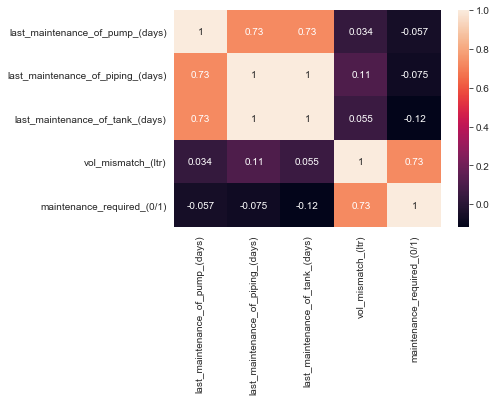

In [88]:
#Checking for Correlation before taking care of Null values:
sns.heatmap(df.corr(),annot=True)

In [91]:
#Taking care of Null values.

df['last_maintenance_of_pump_(days)'] = df['last_maintenance_of_pump_(days)'].fillna(df['last_maintenance_of_pump_(days)'].mean())
df['last_maintenance_of_pump_(days)']=df['last_maintenance_of_pump_(days)'].astype(int)

df['last_maintenance_of_piping_(days)'] = df['last_maintenance_of_piping_(days)'].fillna(df['last_maintenance_of_piping_(days)'].mean())
df['last_maintenance_of_piping_(days)']=df['last_maintenance_of_piping_(days)'].astype(int)

df['last_maintenance_of_tank_(days)'] = df['last_maintenance_of_tank_(days)'].fillna(df['last_maintenance_of_tank_(days)'].mean())
df['last_maintenance_of_tank_(days)']=df['last_maintenance_of_tank_(days)'].astype(int)

In [92]:
#We can verify in info if we still have any Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   last_maintenance_of_pump_(days)    100 non-null    int32
 1   last_maintenance_of_piping_(days)  100 non-null    int32
 2   last_maintenance_of_tank_(days)    100 non-null    int32
 3   vol_mismatch_(ltr)                 100 non-null    int64
 4   maintenance_required_(0/1)         100 non-null    uint8
dtypes: int32(3), int64(1), uint8(1)
memory usage: 2.2 KB


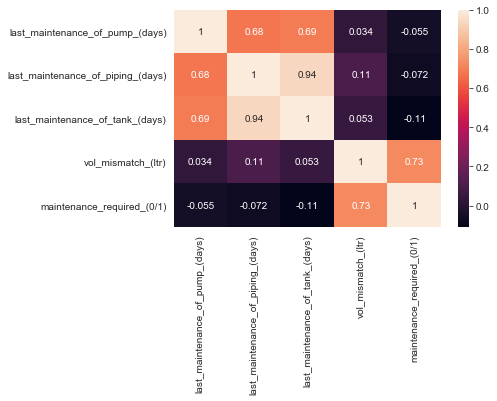

In [93]:
#Checking for Correlation after taking care of Null values:
sns.heatmap(df.corr(),annot=True)

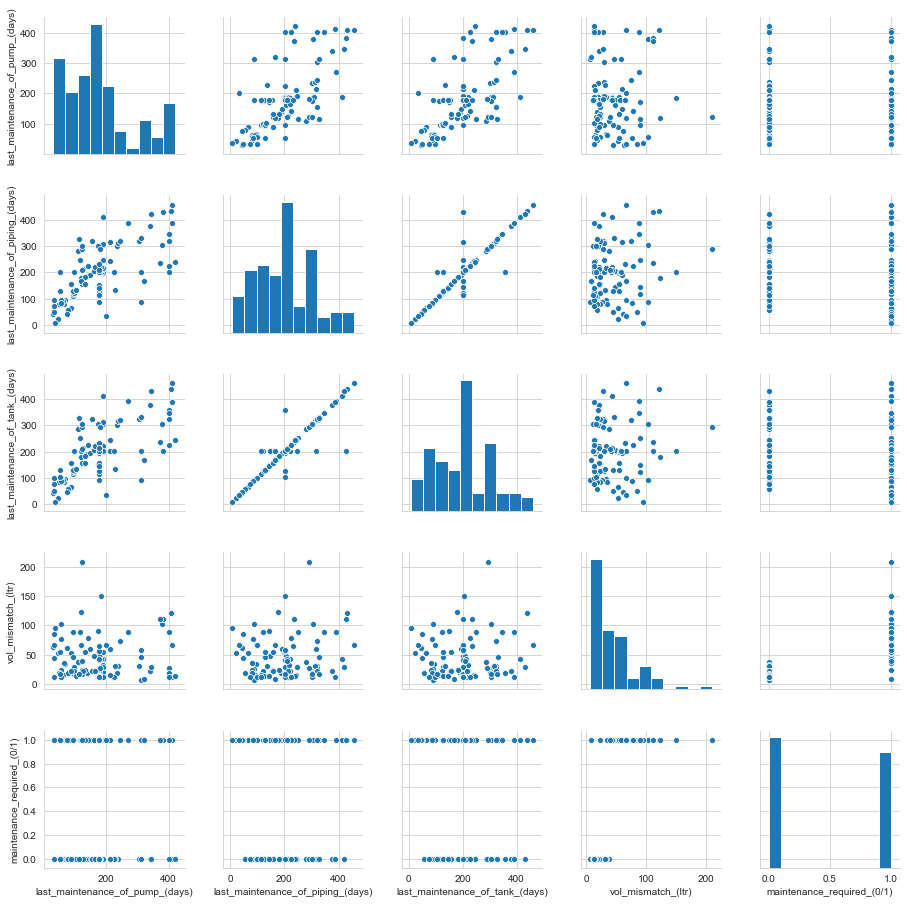

In [95]:
#Chekcing the pair plots:
sns.set_style('whitegrid')
sns.pairplot(df)

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
#Preparing the x and y value for train-test-split and the ML algorithm
x = df.drop('maintenance_required_(0/1)', axis=1)
x.head()

,last_maintenance_of_pump_(days),last_maintenance_of_piping_(days),last_maintenance_of_tank_(days),vol_mismatch_(ltr)
0,68,94,95,33
1,214,317,201,60
2,189,305,306,26
3,173,143,148,90
4,98,201,126,29


In [98]:
y = df['maintenance_required_(0/1)']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: maintenance_required_(0/1), dtype: uint8

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=9)

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
lr = LogisticRegression()

In [102]:
#Fitting the train data into the model
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
#Predicting the test output
y_pred = lr.predict(x_test)

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [105]:
confusion_matrix(y_test, y_pred)

array([[18,  1],
       [ 1, 10]], dtype=int64)

In [106]:
#Checking for accuracy
accuracy_score(y_test, y_pred)

0.9333333333333333

Conclusion: We have acheived a good level of accuracy for the model with the help of Logistic Regression. 